Ćwiczenie 1:
- wygeneruj syntetyczny zbiór danych przy użyciu sklearn.datasets.make_gaussian_quantiles
wymagane parametry:
    n_samples = IDX // IDX[::2]
    n_features = 2
    n_classes = 2
    random_state = IDX
    mean=[ IDX[2] / IDX[3], IDX[4] / IDX[5] ]
    cov=IDX[4] / IDX[3]
gdzie IDX to aktualny numer indeksu, np. dla numeru indeksu 123456:
    n_samples = 123456 // 135
    n_features = 2
    n_classes = 2
    random_state = 123456
    mean=[ 3 / 4, 5 / 6 ]
    cov=5 / 4
w przypadku gdy którakowlwiek z cyfr koniecznych do policzenia wartości mean i cov wynosi zero należy zastapić ja wartością jeden
- naucz klasyfiktator SVM z bilioteki sklearn (sklearn.svm.SVC)
- narysuj granice decyzyjną
- porównaj kształt granicy decyzyjnej dla C=1, 10, 100 i 1000
- porównaj kształt granicy decyzyjnej dla czterech dostepnych funkcji jądra (‘linear’, ‘poly’, ‘sigmoid’)

Ćwiczenie 2:
- pobierz zbiór danych o pulsarach: https://archive.ics.uci.edu/ml/datasets/HTRU2
- policz ilość brakujących wartości w każdej z kolumn
- stwórz dwie kopie zbioru, na jednej z nich dokonaj eliminacji obserwacji odstających
- dokonaj normalizacji danych w obu zbiorach
- dokonaj poprawnego podziału danych na zbiory testowe i treningowe (w obu zbiorach w taki sam sposób)
- porównaj accuracy dla C=1 i 1000 oraz funckji jądra 'rbf' oraz 'linear'
- dla najlepszego zestawu hiperparametrów wyświetl confusion matrix
        do jakich wartości macierzy powinno się dążyć jeżeli mamy wybrać cel dla pierwszej sondy mającej z bliska zbadać pulsara?
- narysuj krzywą ROC
- policz pole pod krzywą ROC

Ćwiczenie 1:
- generowanie danych z poprawnymi parametrami - 1pkt
- normalizacja - 1pkt
- poprawne nauczenie klasyfikatora - 1pkt
- wizualizacja granicy decyzyjnej - 1pkt
- wpływ regularyzacji
    - wykresy - 2pkt
    - obserwacje + wnioski - 2pkt
- wpływ funkcji jądra
    - wykresy - 2pkt
    - obserwacje + wnioski - 2pkt

 

Ćwiczenie 2:
- wyliczenie brakujących wartości - 1pkt
- eliminacja obserwacji odstających - 1pkt
- normalizacja - 1pkt
- taki sam podział obu kopii - 1pkt
- porówniane accuracy
    - po 1 pkt za każdą parę
- confusion matrix - 1pkt
    - wnioski dotyczące dopuszczalnego typu błędu (odpowiedź na pytanie z instrukcji) - 1pkt
- wykres ROC - 1pkt
- wartość AUĆ - 1pkt
    - wnioski dotyczące jakości uzyskanego klasyfikatora - 1pkt

## Ćwiczenie 1

In [3]:
from sklearn.datasets import make_gaussian_quantiles
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

Generuję zbiór danych

In [4]:
IDX = "233002"
div_by_zero = lambda x: 1 if x == 0 else x

X, y = make_gaussian_quantiles(n_samples = int(IDX) // int(IDX[::2]), 
                               n_features = 2, 
                               n_classes = 2,
                               random_state = int(IDX), 
                               mean=[div_by_zero(int(IDX[2])) / div_by_zero(int(IDX[3])), div_by_zero(int(IDX[4])) / div_by_zero(int(IDX[5]))],
                               cov=div_by_zero(int(IDX[4])) / div_by_zero(int(IDX[3]))
)

print("np.shape(X)=", np.shape(X))
print("np.shape(y)=", np.shape(y))

np.shape(X)= (1013, 2)
np.shape(y)= (1013,)


Normalizuje zbiór danych

In [5]:
X_norm =(X - np.tile(np.min(X, axis = 0), (1013, 1)) ) / ( np.tile(np.max(X, axis=0) - np.min(X, axis=0), (1013,1)) )

Uczę klasyfiktator SVM oraz rysuję granicę decyzyjną

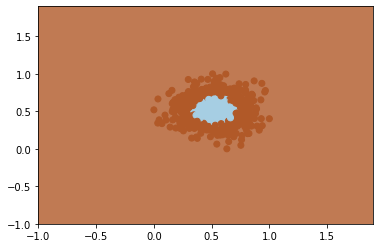

In [6]:
svc = svm.SVC().fit(X_norm, y)

x_min, x_max = X_norm[:, 0].min() - 1, X_norm[:, 0].max() + 1
y_min, y_max = X_norm[:, 1].min() - 1, X_norm[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                    np.arange(y_min, y_max, 0.1))
z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X_norm[:, 0], X_norm[:, 1], c=y, cmap=plt.cm.Paired)

In [7]:
def train_classificator(X, y,  c=1.0, kernel='rbf'):
    return svm.SVC(kernel=kernel, C=c).fit(X, y)

Rysuję kształt granicy decyzyjnej dla C=1, 10, 100 i 1000

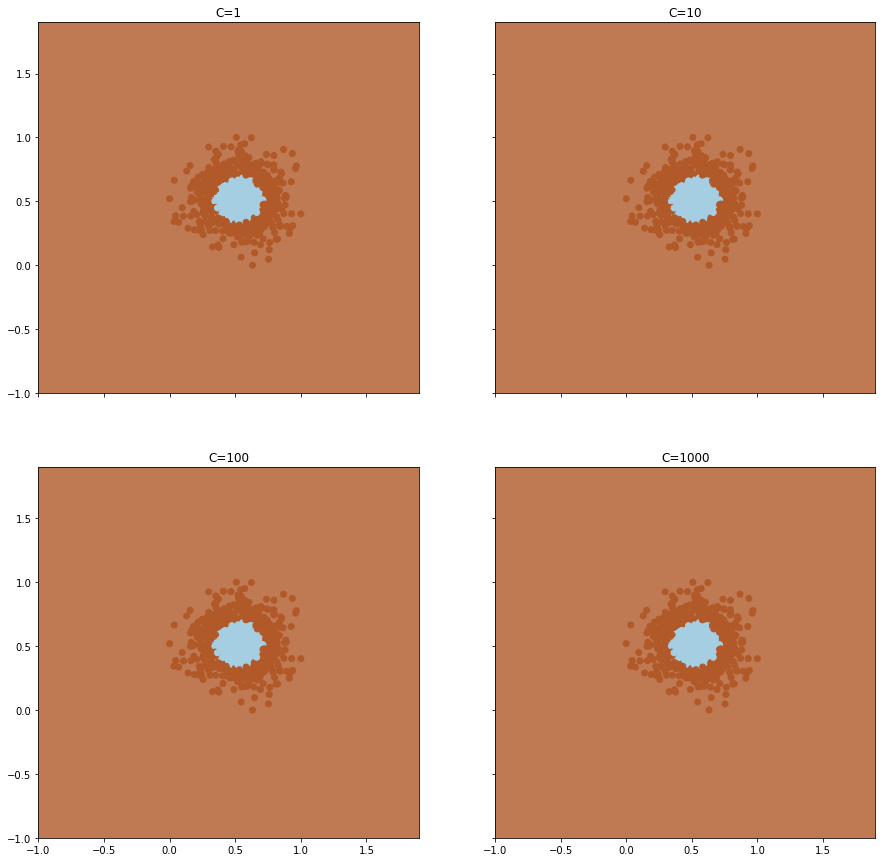

In [28]:
fig, axes = plt.subplots(2, 2, sharex='all', sharey='all', figsize=(15, 15))

for idx, c in enumerate([1, 10, 100, 1000]):
    svc = train_classificator(X_norm, y, c=c)

    x_min, x_max = X_norm[:, 0].min() - 1, X_norm[:, 0].max() + 1
    y_min, y_max = X_norm[:, 1].min() - 1, X_norm[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))
    z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    axes[idx // 2, idx % 2].set_title(f'C={c}')
    axes[idx // 2, idx % 2].contourf(xx, yy, z, cmap=plt.cm.Paired, alpha=0.8)
    axes[idx // 2, idx % 2].scatter(X_norm[:, 0], X_norm[:, 1], c=y, cmap=plt.cm.Paired)    

W przypadku różnych wielkości parametrów regularyzacji, nie widać znaczących różnic, wszystkie kształty granicy decyzyjnej wyglądają tak samo.

Rysuje kształt granicy decyzyjnej dla czterech dostepnych funkcji jądra (‘rbf’, ‘linear’, ‘poly’, ‘sigmoid’)

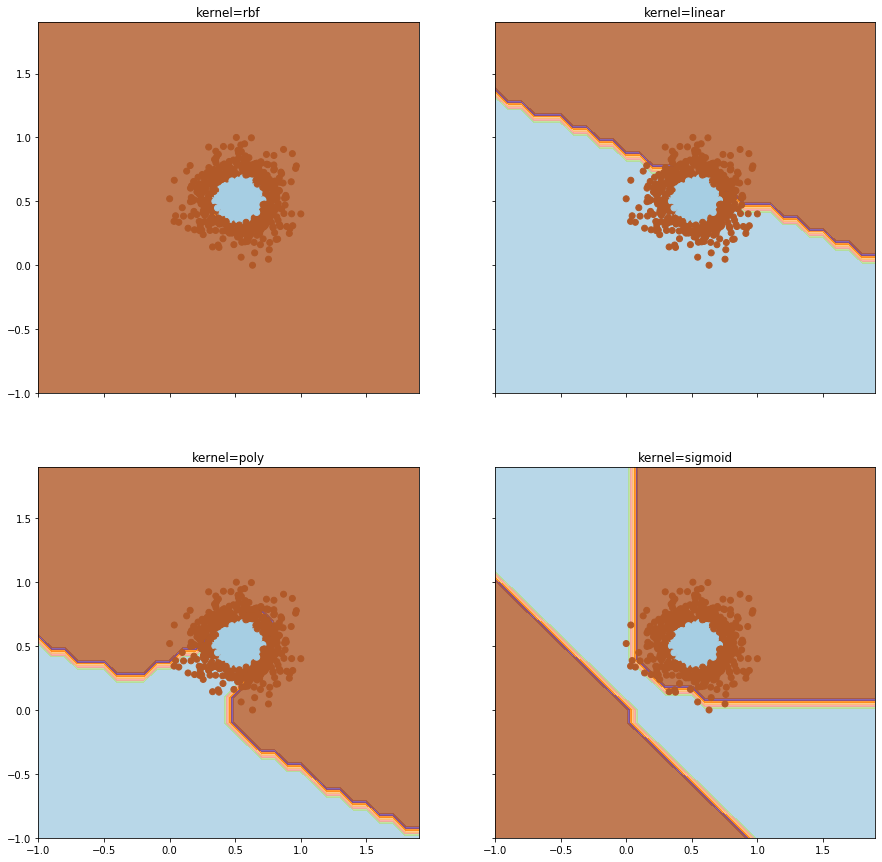

In [9]:
fig, axes = plt.subplots(2, 2, sharex='all', sharey='all', figsize=(15, 15))

for idx, kernel in enumerate(['rbf', 'linear', 'poly', 'sigmoid']):
    svc = train_classificator(X_norm, y, kernel=kernel)

    x_min, x_max = X_norm[:, 0].min() - 1, X_norm[:, 0].max() + 1
    y_min, y_max = X_norm[:, 1].min() - 1, X_norm[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))
    z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    axes[idx // 2, idx % 2].set_title(f'kernel={kernel}')
    axes[idx // 2, idx % 2].contourf(xx, yy, z, cmap=plt.cm.Paired, alpha=0.8)
    axes[idx // 2, idx % 2].scatter(X_norm[:, 0], X_norm[:, 1], c=y, cmap=plt.cm.Paired)    

Najlepszy kształt granicy decyzyjnej uzykujemy dzieki użyciu rbf, reszta kształtów dopasowań granic jest znacznie mniej dokładna.

## Ćwiczenie 2

In [8]:
import pandas as pd
import os
import numpy as np

Wczytuję dataset, nazwy kolumn wziąłem z pliku .arff

In [5]:
path = os.path.join(f"./HTRU2/", f"HTRU_2.csv")
columns = ['Profile_mean', 'Profile_stdev', 'Profile_skewness', 'Profile_kurtosis', 'DM_mean', 'DM_stdev', 'DM_skewness', 'DM_kurtosis', 'class']
df = pd.read_csv(path, names=columns, header=None)
print(len(df))
df.head(5)

17898


,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


Sprawdzam ile jest brakujących wartości w poszczególnych kolumnach

In [6]:
df.isnull().sum()

Profile_mean        0
Profile_stdev       0
Profile_skewness    0
Profile_kurtosis    0
DM_mean             0
DM_stdev            0
DM_skewness         0
DM_kurtosis         0
class               0
dtype: int64

Usuwam wartosci, ktore odstają więcej niż 1.5 rozstępu ćwiartkowego

In [21]:
df_original = df.copy()
for kolumna in df.columns:
    Q1 = df[kolumna].quantile(0.25)
    Q3 = df[kolumna].quantile(0.75)
    IQR = Q3 - Q1
    A = Q1 - 1.5 * IQR 
    B = Q3 + 1.5 * IQR
    print(f"{kolumna}: {A}, {B}")
    df[kolumna] = np.where(df[kolumna]>B, B, df[kolumna])
    df[kolumna] = np.where(df[kolumna]<A, A, df[kolumna])

df.Profile_stdev.min()

Profile_mean: 0.0, 1.0
Profile_stdev: 1.6653345369377348e-16, 0.9999999999999999
Profile_skewness: -5.551115123125783e-17, 1.0000000000000002
Profile_kurtosis: -0.016207221044423792, 1.0
DM_mean: -0.340998367352808, 1.0
DM_stdev: -0.3310654438355368, 1.0
DM_skewness: -1.6653345369377348e-16, 1.0000000000000002
DM_kurtosis: -0.4015511288405642, 1.0


1.6653345369377348e-16

In [10]:
df_y = df.iloc[:, 8]
df_x = df.loc[:, :'DM_kurtosis']
df=(df_x-df_x.min())/(df_x.max()-df_x.min())

df_original_y = df_original.loc[:, 'class']
df_original_x = df_original.loc[:, :'DM_kurtosis']
df_original=(df_original_x-df_original_x.min())/(df_original_x.max()-df_original_x.min())

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df, df_y,
                                                        test_size=0.2)

x_train_orginal, x_test_orginal, y_train_orginal, y_test_orginal = train_test_split(df_original, df_original_y,
                                                        test_size=0.3,
                                                        random_state=42)

In [12]:
from sklearn.metrics import accuracy_score

def get_accuracy(x_train, x_test, y_train, y_test):
    for c in [1, 1000]:
        for kernel in ['rbf', 'linear']:
            svc = train_classificator(x_train, y_train, c=c, kernel=kernel)
            predicted = svc.predict(x_test)
            accuracy = accuracy_score(y_test, predicted)
            print(f'Dla c={c} oraz kernel={kernel} skutecznosc modelu wynosi: {accuracy}')

In [13]:
print(f'Dla oryinalnych danych')
get_accuracy(x_train_orginal, x_test_orginal, y_train_orginal, y_test_orginal)
print(f'Dla danych obcietych')
get_accuracy(x_train, x_test, y_train, y_test)

Dla oryinalnych danych


NameError: name 'train_classificator' is not defined

Dla obu datasetów najlepszy wynik był dla: c=1000 oraz kernel=linear

In [24]:
from sklearn.metrics import confusion_matrix
c = 1000
kernel = 'linear'
svc1 = train_classificator(x_train, y_train, c=c, kernel=kernel)
predicted1 = svc1.predict(x_test)
print(f'Dla obcietego zbiotu danych')
print(confusion_matrix(y_test, predicted1))

svc2 = train_classificator(x_train_orginal, y_train_orginal, c=c, kernel=kernel)
predicted2 = svc2.predict(x_test_orginal)
print(f'Dla calego zbiotu danych')
print(confusion_matrix(y_test_orginal, predicted2))

Dla obcietego zbiotu danych
[[2189    1]
 [  32   41]]
Dla calego zbiotu danych
[[4863   21]
 [  94  392]]


Chcemy otrzymać jak większe wartości na przekątnej macierzy, otrzymując jednocześnie jak najmniejsze wartości poza przekątną.

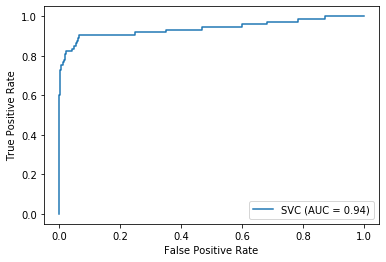

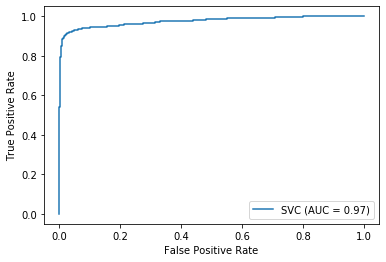

In [20]:
import sklearn
from sklearn.metrics import plot_roc_curve

plot_roc_curve(svc1, x_test, y_test) 
plt.show()     
plot_roc_curve(svc2, x_test_orginal, y_test_orginal) 
plt.show()                                    

In [27]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

print(f'Dla obcietego zbiotu danych')
fpr, tpr, thresholds = roc_curve(y_test, predicted1)
print(auc(fpr, tpr))

print(f'Dla calego zbiotu danych')
fpr, tpr, thresholds = roc_curve(y_test_orginal, predicted2)
print(auc(fpr, tpr))

Dla obcietego zbiotu danych
0.7805936073059361
Dla calego zbiotu danych
0.9011423039200817
